# Project: Analyzing TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this investigate a dataset project I will be analyzing TMDb movie data from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata). I will also take steps for this project - Data wrangling, cleaning, Posing quesitons, analysing and making conclusions. I'll explain each step in more deail.

**Research Question**
1. Which genre is most frequently showed?
2. Which genre is most popular in each year?
3. What is the most popular movie?
4. If it is popular does it have a higher rating?
5. What movie got the highest rating?

Basic set up - Import analysis and visualization libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties
**Read csv file and check the info of the df so I can see how many columns and rows in each column**
- I see some missing value
- I can check the data type 

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Using df.head() to have more sense of the data**
- There are a lot of columns that I don't need
- Some columns inclue multiple values so I might need to fix them.    

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning 
- After data wranggling, I decided to remove some columns that I didn't need to use.
- I used the following columns for investigating the dataset.
- : id (For merging data), popularity, original_title, genres, vote_average and release_year

In [4]:
df.drop(['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 594.3+ KB


- I checked the info again and found missing data in the genre column, so I drop rows using *dropna()*.

In [6]:
df.dropna(inplace=True)

- The next step is to fix the genre column. We found it has multiple values seperated by '|'

In [7]:
list_of_genre = df['genres'].str.split('|').tolist()

- Then, I stacked the genres using .stack(). I had to reset the index that I used for stacking so I could get a nice data frame.

In [8]:
stacked_genre = pd.DataFrame(list_of_genre, index=df['id']).stack()

In [9]:
stacked_genre.head().reset_index()

,id,level_1,0
0,135397,0,Action
1,135397,1,Adventure
2,135397,2,Science Fiction
3,135397,3,Thriller
4,76341,0,Action


- Now I need to merge stacked data with the original data based on 'id' column. 
- After merging, I removed unnecessary columns - 'id' and 'genres'(original one). 
- I also, rename columname '0' to 'genre'(new one) to clearify. 

In [10]:
merged_df = df.merge(stacked_genre.to_frame(), on='id', right_index=True)

In [11]:
merged_df.rename(index=str, columns={0: "genre"}, inplace=True)
merged_df.drop(['id', 'genres'], axis=1, inplace=True)

In [12]:
merged_df.head()

,popularity,original_title,vote_count,vote_average,release_year,genre
0,32.985763,Jurassic World,5562,6.5,2015,Action
0,32.985763,Jurassic World,5562,6.5,2015,Adventure
0,32.985763,Jurassic World,5562,6.5,2015,Science Fiction
0,32.985763,Jurassic World,5562,6.5,2015,Thriller
1,28.419936,Mad Max: Fury Road,6185,7.1,2015,Action


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which genre is most frequently showed?

- To find the genre that is the most popular, I made a quick computed result.
- Based on this, Drama is most frequently showed and Comedy is followed by it.

In [13]:
merged_df['genre'].value_counts().head()

Drama       4763
Comedy      3793
Thriller    2910
Action      2387
Romance     1712
Name: genre, dtype: int64

- But I want to see the visualization for the above result 
- I made a bar chart using Seaborn.
- Drama has a significantly large portion. 

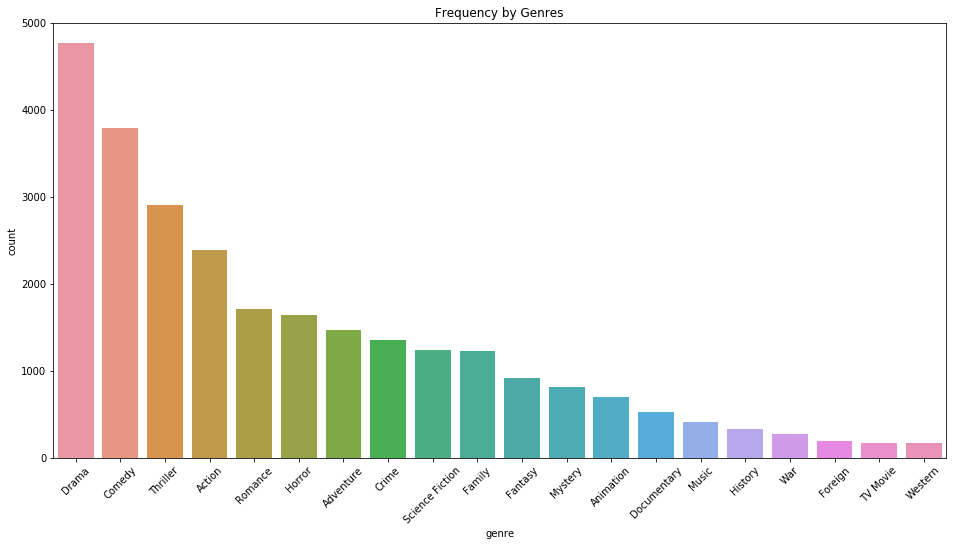

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x='genre', data=merged_df, order = merged_df['genre'].value_counts().index)
plt.title('Frequency by Genres')
plt.xticks(rotation=45)
plt.show()

### Research Question 2 : Which genre is most popular in each year?

- The following heat map shows which genre is more popular in each specific year
- As we discovered above, Drama has a lot of counted values but it doesn't mean that it is the most popular genre. 
- In the 60s Animation was popular, and in more recent times, Action, Crime, Fantasy, SF genres are more popular.

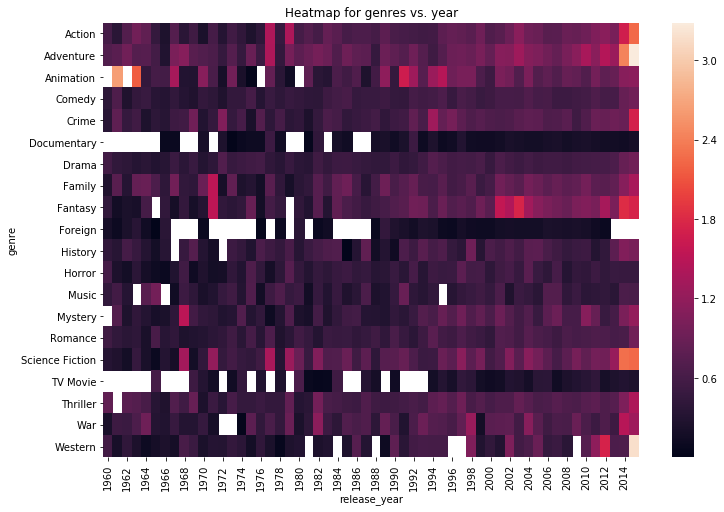

In [15]:
h = merged_df.pivot_table(index='genre', columns='release_year',values='popularity')
plt.figure(figsize=(12,8))
plt.title('Heatmap for genres vs. year')
sns.heatmap(h)

### Research Question 3 : What is the most popular movie?

- I computed the most popular movie based on popularity
- It was Jurassic World and its genre is Action|Adventure|SF|Thriller. 

In [16]:
merged_df[merged_df['popularity'] == merged_df['popularity'].max()]

,popularity,original_title,vote_count,vote_average,release_year,genre
0,32.985763,Jurassic World,5562,6.5,2015,Action
0,32.985763,Jurassic World,5562,6.5,2015,Adventure
0,32.985763,Jurassic World,5562,6.5,2015,Science Fiction
0,32.985763,Jurassic World,5562,6.5,2015,Thriller


- Now I'm curious about those genres' and want to see more closely for year by year flows. 
- There are ups and downs but, sa time goes by, their popularity is getting higher.

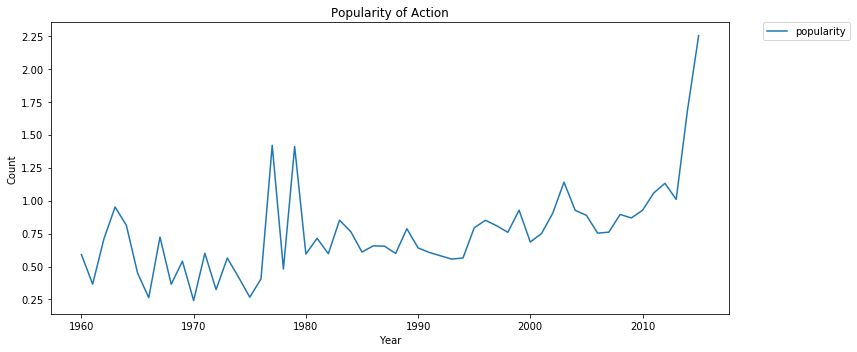

In [17]:
merged_df[merged_df['genre'] == 'Action'].groupby('release_year')['popularity'].mean().plot(figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Popularity of Action')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()

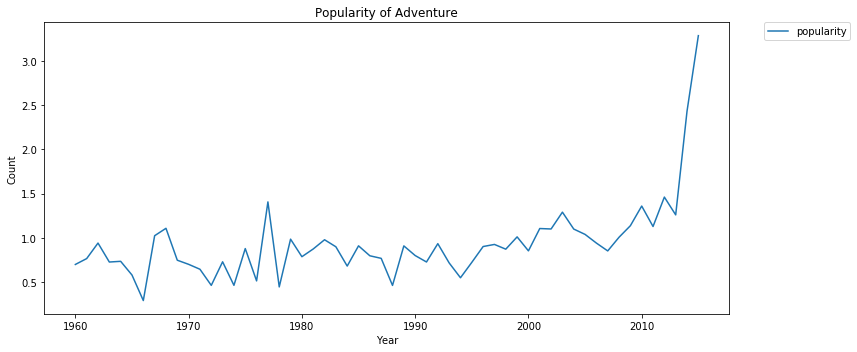

In [18]:
merged_df[merged_df['genre'] == 'Adventure'].groupby('release_year')['popularity'].mean().plot(figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Popularity of Adventure')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()

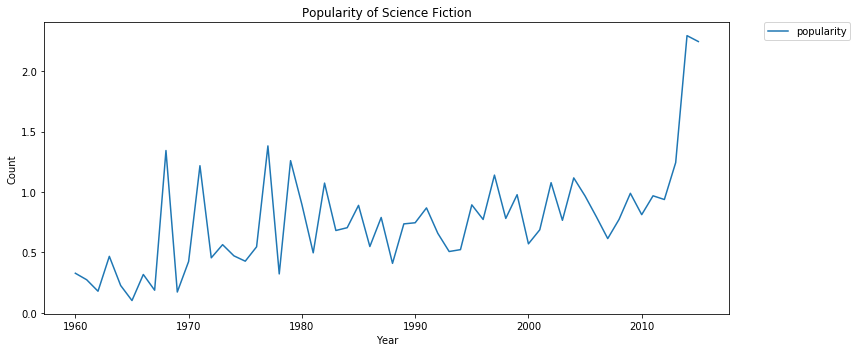

In [19]:
merged_df[merged_df['genre'] == 'Science Fiction'].groupby('release_year')['popularity'].mean().plot(figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Popularity of Science Fiction')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()

### Research Question 4 : If it is popular does gets higher ratings?

- First of all, I got a counted vote average[1 to 10]
- People usaully vote 6!

Text(0,0.5,'Count')

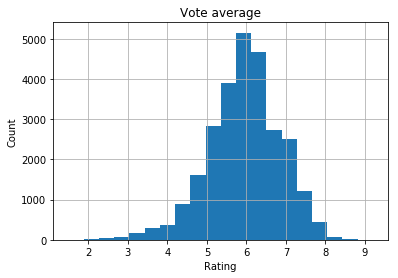

In [20]:
merged_df['vote_average'].hist(bins=20)
plt.title('Vote average')
plt.xlabel('Rating')
plt.ylabel('Count')

- Now I used a lmplot to see the relationship between poplarity and vote average.
- We can see if it's more popular and likely to get higher vote. 

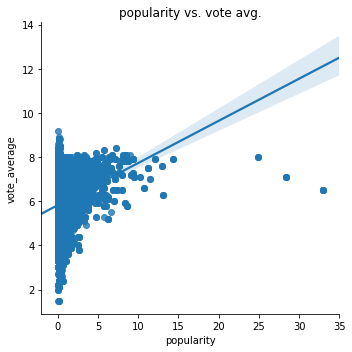

In [21]:
sns.lmplot(x='popularity',y='vote_average',data=merged_df)
plt.title('popularity vs. vote avg.')
plt.tight_layout()

### Research Question 5 : What movie got the highest rating?
- I made three categries - High, Average and Low based on ratings.
- High graded movies were 1005, Low graded movies were 7150 and Average graded were 18815 which are make sense.

In [22]:
def extract_grading(rating):
    df = merged_df.copy()
    
    rating = df['vote_average']
    grading = ['High', 'Average', 'Low']
    
    df.loc[(rating >= 7.5), 'Grading']= grading[0]
    df.loc[(rating <7.5)&(rating >=5.5),'Grading']= grading[1]
    df.loc[(rating < 5.5),'Grading'] = grading[2]

    return df

graded_df = extract_grading(merged_df)

In [23]:
graded_df['Grading'].value_counts()

Average    18815
Low         7150
High        1005
Name: Grading, dtype: int64

- Finally I find the movie got the highst rating. It was The Mask You Live in and the rating was 8.9 even though its popularity was low. 

In [24]:
merged_df[merged_df['vote_average'] > 8.5]

,popularity,original_title,vote_count,vote_average,release_year,genre
538,0.114264,The Mask You Live In,11,8.9,2015,Documentary
1200,0.129531,Black Mirror: White Christmas,41,8.8,2014,Drama
1200,0.129531,Black Mirror: White Christmas,41,8.8,2014,Horror
1200,0.129531,Black Mirror: White Christmas,41,8.8,2014,Mystery
1200,0.129531,Black Mirror: White Christmas,41,8.8,2014,Science Fiction
1200,0.129531,Black Mirror: White Christmas,41,8.8,2014,Thriller
2269,0.222293,Life Cycles,27,8.8,2010,Documentary
2401,0.067753,Opeth: In Live Concert At The Royal Albert Hall,10,8.6,2010,Music
3894,0.006925,The Story of Film: An Odyssey,14,9.2,2011,Documentary
6911,0.212010,Pink Floyd: Pulse,23,8.7,2006,Music


<a id='conclusions'></a>
## Conclusions

I really enjoyed invastigating this movie dataset. It was a huge dataset from the 1960s to the 2010s so I felt like I traveled through movie history. I found out a few interesting details.

1. Higher genre frequency doesn't mean its genre is popular. 
2. However, if it's genre is popular, it's likely to get higher ratings than others. 
3. Based on a heat map, Documentary, Foreign and TV movie genres are the least popular of all time. 

Limitations: 
I wasn't sure about the popularity and rating results. if I knew what the popularity and average rating results were based off of, I could have done more specific research with the data and made better conclusions. 

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295